In [1]:
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [2]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
test_data -= mean

train_data /= std
test_data /= std

In [3]:
from keras import models, layers
import numpy as np

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_X = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_y = train_labels[i * num_val_samples : (i+1) * num_val_samples]
    partial_X = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1) * num_val_samples:]],
        axis=0
    )
    partial_y = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i+1) * num_val_samples:]],
        axis=0
    )
    model = build_model()
    history = model.fit(partial_X, partial_y, validation_data=(val_X, val_y), epochs=num_epochs, batch_size=1)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

processing fold # 0
Epoch 1/500
303/303 [==============================] - 2s 3ms/step - loss: 342.7858 - mae: 16.1661 - val_loss: 40.4016 - val_mae: 4.1954
Epoch 2/500
303/303 [==============================] - 1s 2ms/step - loss: 35.1251 - mae: 4.0509 - val_loss: 27.1910 - val_mae: 3.1733
Epoch 3/500
303/303 [==============================] - 1s 2ms/step - loss: 27.9796 - mae: 3.4909 - val_loss: 21.8603 - val_mae: 2.6759
Epoch 4/500
303/303 [==============================] - 1s 2ms/step - loss: 21.0825 - mae: 2.9574 - val_loss: 18.5555 - val_mae: 2.5272
Epoch 5/500
303/303 [==============================] - 1s 2ms/step - loss: 19.5750 - mae: 2.6685 - val_loss: 15.7835 - val_mae: 2.4169
Epoch 6/500
303/303 [==============================] - 1s 2ms/step - loss: 16.5876 - mae: 2.6118 - val_loss: 14.4711 - val_mae: 2.3489
Epoch 7/500
303/303 [==============================] - 1s 2ms/step - loss: 18.0980 - mae: 2.5392 - val_loss: 15.6407 - val_mae: 2.2262
Epoch 8/500
303/303 [============

Epoch 62/500
303/303 [==============================] - 1s 2ms/step - loss: 8.2089 - mae: 1.6964 - val_loss: 7.2037 - val_mae: 1.7808
Epoch 63/500
303/303 [==============================] - 1s 2ms/step - loss: 11.6090 - mae: 1.8899 - val_loss: 8.4322 - val_mae: 2.0640
Epoch 64/500
303/303 [==============================] - 1s 2ms/step - loss: 5.2994 - mae: 1.5906 - val_loss: 8.8099 - val_mae: 2.1142
Epoch 65/500
303/303 [==============================] - 1s 2ms/step - loss: 6.7010 - mae: 1.6465 - val_loss: 6.7581 - val_mae: 1.7540
Epoch 66/500
303/303 [==============================] - 1s 2ms/step - loss: 4.3682 - mae: 1.4958 - val_loss: 8.8388 - val_mae: 2.1611
Epoch 67/500
303/303 [==============================] - 1s 2ms/step - loss: 5.5041 - mae: 1.4444 - val_loss: 7.1969 - val_mae: 1.7974
Epoch 68/500
303/303 [==============================] - 1s 2ms/step - loss: 7.7980 - mae: 1.5571 - val_loss: 6.9411 - val_mae: 1.8813
Epoch 69/500
303/303 [==============================] - 1s 2m

Epoch 123/500
303/303 [==============================] - 0s 2ms/step - loss: 2.9354 - mae: 1.1103 - val_loss: 7.7055 - val_mae: 2.0680
Epoch 124/500
303/303 [==============================] - 0s 2ms/step - loss: 2.6554 - mae: 1.1213 - val_loss: 7.9533 - val_mae: 2.1766
Epoch 125/500
303/303 [==============================] - 1s 2ms/step - loss: 2.9764 - mae: 1.0988 - val_loss: 9.2818 - val_mae: 2.2988
Epoch 126/500
303/303 [==============================] - 0s 2ms/step - loss: 3.3872 - mae: 1.2552 - val_loss: 8.9754 - val_mae: 2.2211
Epoch 127/500
303/303 [==============================] - 0s 2ms/step - loss: 2.9776 - mae: 1.2113 - val_loss: 9.6776 - val_mae: 2.1115
Epoch 128/500
303/303 [==============================] - 1s 2ms/step - loss: 3.9778 - mae: 1.4187 - val_loss: 10.1986 - val_mae: 2.4448
Epoch 129/500
303/303 [==============================] - 1s 2ms/step - loss: 3.3215 - mae: 1.3322 - val_loss: 7.6053 - val_mae: 2.0210
Epoch 130/500
303/303 [==============================]

303/303 [==============================] - 0s 1ms/step - loss: 2.0134 - mae: 0.9933 - val_loss: 10.0990 - val_mae: 2.3722
Epoch 244/500
303/303 [==============================] - 1s 2ms/step - loss: 1.6723 - mae: 0.9291 - val_loss: 9.7766 - val_mae: 2.2121
Epoch 245/500
303/303 [==============================] - 1s 2ms/step - loss: 1.8013 - mae: 0.9827 - val_loss: 8.3033 - val_mae: 2.1990
Epoch 246/500
303/303 [==============================] - 1s 2ms/step - loss: 1.9999 - mae: 0.9986 - val_loss: 9.6309 - val_mae: 2.3399
Epoch 247/500
303/303 [==============================] - 1s 2ms/step - loss: 1.6403 - mae: 0.9337 - val_loss: 12.8816 - val_mae: 2.4889
Epoch 248/500
303/303 [==============================] - 1s 2ms/step - loss: 1.6654 - mae: 0.9156 - val_loss: 10.0143 - val_mae: 2.2697
Epoch 249/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5659 - mae: 0.8374 - val_loss: 12.2030 - val_mae: 2.5965
Epoch 250/500
303/303 [==============================] - 1s 2ms/s

303/303 [==============================] - 0s 1ms/step - loss: 1.1332 - mae: 0.7708 - val_loss: 10.9744 - val_mae: 2.4447
Epoch 364/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1626 - mae: 0.8214 - val_loss: 11.0306 - val_mae: 2.4475
Epoch 365/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1637 - mae: 0.7608 - val_loss: 10.2865 - val_mae: 2.4021
Epoch 366/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2878 - mae: 0.7750 - val_loss: 11.5253 - val_mae: 2.5063
Epoch 367/500
303/303 [==============================] - 0s 2ms/step - loss: 1.2710 - mae: 0.7892 - val_loss: 13.3313 - val_mae: 2.6229
Epoch 368/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2058 - mae: 0.8433 - val_loss: 11.3837 - val_mae: 2.4390
Epoch 369/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1866 - mae: 0.8109 - val_loss: 11.5424 - val_mae: 2.4176
Epoch 370/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 0.9903 - mae: 0.7646 - val_loss: 11.8470 - val_mae: 2.5147
Epoch 484/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2842 - mae: 0.7669 - val_loss: 13.6115 - val_mae: 2.6573
Epoch 485/500
303/303 [==============================] - 0s 2ms/step - loss: 0.9085 - mae: 0.7043 - val_loss: 12.8826 - val_mae: 2.6720
Epoch 486/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2503 - mae: 0.7757 - val_loss: 12.1967 - val_mae: 2.5885
Epoch 487/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9617 - mae: 0.7163 - val_loss: 11.9674 - val_mae: 2.6027
Epoch 488/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7762 - mae: 0.6736 - val_loss: 12.2869 - val_mae: 2.5790
Epoch 489/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4712 - mae: 0.7837 - val_loss: 13.2699 - val_mae: 2.7036
Epoch 490/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 2.4809 - mae: 1.1566 - val_loss: 13.6061 - val_mae: 2.5288
Epoch 105/500
303/303 [==============================] - 1s 2ms/step - loss: 3.0488 - mae: 1.2361 - val_loss: 12.7293 - val_mae: 2.4936
Epoch 106/500
303/303 [==============================] - 1s 2ms/step - loss: 3.1721 - mae: 1.1707 - val_loss: 11.5134 - val_mae: 2.3214
Epoch 107/500
303/303 [==============================] - 1s 2ms/step - loss: 2.6039 - mae: 1.1793 - val_loss: 11.2202 - val_mae: 2.3534
Epoch 108/500
303/303 [==============================] - 0s 2ms/step - loss: 2.8360 - mae: 1.1753 - val_loss: 11.6508 - val_mae: 2.5173
Epoch 109/500
303/303 [==============================] - 1s 2ms/step - loss: 5.6455 - mae: 1.4117 - val_loss: 10.2243 - val_mae: 2.3188
Epoch 110/500
303/303 [==============================] - 1s 2ms/step - loss: 2.8881 - mae: 1.2222 - val_loss: 16.3949 - val_mae: 2.9018
Epoch 111/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 0s 2ms/step - loss: 1.5022 - mae: 0.8653 - val_loss: 15.1750 - val_mae: 2.5848
Epoch 225/500
303/303 [==============================] - 0s 2ms/step - loss: 1.4090 - mae: 0.8401 - val_loss: 20.8448 - val_mae: 2.7693
Epoch 226/500
303/303 [==============================] - 0s 2ms/step - loss: 1.2352 - mae: 0.8284 - val_loss: 18.3678 - val_mae: 2.6732
Epoch 227/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3299 - mae: 0.8320 - val_loss: 26.8109 - val_mae: 3.1568
Epoch 228/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3940 - mae: 0.8840 - val_loss: 21.1704 - val_mae: 2.9055
Epoch 229/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3394 - mae: 0.8405 - val_loss: 15.2752 - val_mae: 2.6979
Epoch 230/500
303/303 [==============================] - 0s 2ms/step - loss: 1.4659 - mae: 0.8837 - val_loss: 23.0820 - val_mae: 3.0639
Epoch 231/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 0s 2ms/step - loss: 0.9159 - mae: 0.6809 - val_loss: 33.9531 - val_mae: 3.0186
Epoch 345/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8814 - mae: 0.7047 - val_loss: 24.6602 - val_mae: 2.8922
Epoch 346/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9844 - mae: 0.6680 - val_loss: 39.3446 - val_mae: 3.2361
Epoch 347/500
303/303 [==============================] - 0s 2ms/step - loss: 1.0568 - mae: 0.7846 - val_loss: 37.2355 - val_mae: 3.2878
Epoch 348/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1055 - mae: 0.7196 - val_loss: 26.6403 - val_mae: 2.8700
Epoch 349/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9743 - mae: 0.7150 - val_loss: 25.2753 - val_mae: 2.8907
Epoch 350/500
303/303 [==============================] - 1s 2ms/step - loss: 0.6815 - mae: 0.6229 - val_loss: 33.4041 - val_mae: 3.1341
Epoch 351/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 0s 2ms/step - loss: 0.8194 - mae: 0.6362 - val_loss: 38.4885 - val_mae: 3.2756
Epoch 465/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7232 - mae: 0.5974 - val_loss: 38.3234 - val_mae: 3.3156
Epoch 466/500
303/303 [==============================] - 0s 2ms/step - loss: 0.6249 - mae: 0.5857 - val_loss: 29.3842 - val_mae: 2.9916
Epoch 467/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7046 - mae: 0.6092 - val_loss: 38.9473 - val_mae: 3.3351
Epoch 468/500
303/303 [==============================] - 0s 2ms/step - loss: 0.6891 - mae: 0.6175 - val_loss: 38.0292 - val_mae: 3.2415
Epoch 469/500
303/303 [==============================] - 0s 2ms/step - loss: 0.9040 - mae: 0.6633 - val_loss: 32.1844 - val_mae: 3.0298
Epoch 470/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7438 - mae: 0.6375 - val_loss: 44.2602 - val_mae: 3.4982
Epoch 471/500
303/303 [==============================] - 0s 1m

Epoch 85/500
303/303 [==============================] - 1s 2ms/step - loss: 3.4556 - mae: 1.4080 - val_loss: 15.3980 - val_mae: 2.6902
Epoch 86/500
303/303 [==============================] - 1s 2ms/step - loss: 3.1835 - mae: 1.3129 - val_loss: 16.0340 - val_mae: 2.6575
Epoch 87/500
303/303 [==============================] - 1s 2ms/step - loss: 3.9210 - mae: 1.3135 - val_loss: 15.0094 - val_mae: 2.5749
Epoch 88/500
303/303 [==============================] - 1s 2ms/step - loss: 3.4368 - mae: 1.3331 - val_loss: 13.6045 - val_mae: 2.4207
Epoch 89/500
303/303 [==============================] - 0s 2ms/step - loss: 2.8033 - mae: 1.2281 - val_loss: 15.7376 - val_mae: 2.6919
Epoch 90/500
303/303 [==============================] - 1s 2ms/step - loss: 3.3484 - mae: 1.3757 - val_loss: 15.8687 - val_mae: 2.7507
Epoch 91/500
303/303 [==============================] - 0s 2ms/step - loss: 4.4046 - mae: 1.3889 - val_loss: 15.5042 - val_mae: 2.6371
Epoch 92/500
303/303 [==============================] -

303/303 [==============================] - 1s 2ms/step - loss: 1.6570 - mae: 0.9750 - val_loss: 14.6264 - val_mae: 2.6894
Epoch 206/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5149 - mae: 0.9082 - val_loss: 15.1605 - val_mae: 2.7269
Epoch 207/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5666 - mae: 0.9131 - val_loss: 13.9002 - val_mae: 2.6384
Epoch 208/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4623 - mae: 0.8716 - val_loss: 17.4196 - val_mae: 2.8363
Epoch 209/500
303/303 [==============================] - 0s 2ms/step - loss: 1.3394 - mae: 0.8615 - val_loss: 15.1299 - val_mae: 2.6554
Epoch 210/500
303/303 [==============================] - 0s 2ms/step - loss: 1.8049 - mae: 0.9117 - val_loss: 14.3052 - val_mae: 2.6788
Epoch 211/500
303/303 [==============================] - 0s 2ms/step - loss: 1.1938 - mae: 0.8181 - val_loss: 15.6245 - val_mae: 2.8105
Epoch 212/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 1.0004 - mae: 0.7393 - val_loss: 13.7693 - val_mae: 2.5016
Epoch 326/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7989 - mae: 0.6501 - val_loss: 12.4472 - val_mae: 2.4480
Epoch 327/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9668 - mae: 0.7050 - val_loss: 14.0780 - val_mae: 2.6380
Epoch 328/500
303/303 [==============================] - 0s 2ms/step - loss: 1.0947 - mae: 0.7782 - val_loss: 15.1948 - val_mae: 2.5161
Epoch 329/500
303/303 [==============================] - 0s 2ms/step - loss: 0.9867 - mae: 0.7208 - val_loss: 13.0149 - val_mae: 2.4983
Epoch 330/500
303/303 [==============================] - 0s 2ms/step - loss: 0.8779 - mae: 0.6761 - val_loss: 12.9907 - val_mae: 2.5336
Epoch 331/500
303/303 [==============================] - 0s 2ms/step - loss: 1.0211 - mae: 0.7236 - val_loss: 15.3269 - val_mae: 2.6880
Epoch 332/500
303/303 [==============================] - 0s 2m

303/303 [==============================] - 1s 2ms/step - loss: 0.7717 - mae: 0.6234 - val_loss: 13.1349 - val_mae: 2.4366
Epoch 446/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7374 - mae: 0.6091 - val_loss: 12.7604 - val_mae: 2.3993
Epoch 447/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8149 - mae: 0.6649 - val_loss: 12.1726 - val_mae: 2.4175
Epoch 448/500
303/303 [==============================] - 0s 2ms/step - loss: 0.6713 - mae: 0.5814 - val_loss: 13.2757 - val_mae: 2.4193
Epoch 449/500
303/303 [==============================] - 0s 2ms/step - loss: 1.0462 - mae: 0.7099 - val_loss: 12.7138 - val_mae: 2.4385
Epoch 450/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7081 - mae: 0.6193 - val_loss: 13.6942 - val_mae: 2.4347
Epoch 451/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8471 - mae: 0.6609 - val_loss: 13.5435 - val_mae: 2.4830
Epoch 452/500
303/303 [==============================] - 1s 2m

Epoch 66/500
303/303 [==============================] - 1s 2ms/step - loss: 5.3067 - mae: 1.4302 - val_loss: 13.5439 - val_mae: 2.4144
Epoch 67/500
303/303 [==============================] - 1s 2ms/step - loss: 5.1300 - mae: 1.3885 - val_loss: 13.6296 - val_mae: 2.4313
Epoch 68/500
303/303 [==============================] - 1s 2ms/step - loss: 3.7151 - mae: 1.2422 - val_loss: 14.1683 - val_mae: 2.5120
Epoch 69/500
303/303 [==============================] - 1s 2ms/step - loss: 4.3895 - mae: 1.2660 - val_loss: 14.8755 - val_mae: 2.5311
Epoch 70/500
303/303 [==============================] - 1s 2ms/step - loss: 3.6114 - mae: 1.3197 - val_loss: 15.1233 - val_mae: 2.6682
Epoch 71/500
303/303 [==============================] - 1s 2ms/step - loss: 4.5513 - mae: 1.4018 - val_loss: 14.5868 - val_mae: 2.5494
Epoch 72/500
303/303 [==============================] - 1s 2ms/step - loss: 3.6957 - mae: 1.4125 - val_loss: 14.3891 - val_mae: 2.5200
Epoch 73/500
303/303 [==============================] -

303/303 [==============================] - 1s 2ms/step - loss: 4.0027 - mae: 1.1969 - val_loss: 13.5174 - val_mae: 2.5154
Epoch 187/500
303/303 [==============================] - 1s 2ms/step - loss: 2.1034 - mae: 1.0045 - val_loss: 15.7299 - val_mae: 2.6716
Epoch 188/500
303/303 [==============================] - 0s 1ms/step - loss: 3.3404 - mae: 1.0882 - val_loss: 13.6721 - val_mae: 2.5224
Epoch 189/500
303/303 [==============================] - 0s 1ms/step - loss: 2.4593 - mae: 1.0497 - val_loss: 13.1268 - val_mae: 2.4253
Epoch 190/500
303/303 [==============================] - 1s 2ms/step - loss: 1.8236 - mae: 0.8993 - val_loss: 12.8023 - val_mae: 2.5062
Epoch 191/500
303/303 [==============================] - 1s 2ms/step - loss: 3.1478 - mae: 1.0478 - val_loss: 13.3620 - val_mae: 2.5868
Epoch 192/500
303/303 [==============================] - 1s 2ms/step - loss: 2.9485 - mae: 1.1457 - val_loss: 13.1193 - val_mae: 2.4988
Epoch 193/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 1.7522 - mae: 0.9544 - val_loss: 13.7930 - val_mae: 2.5256
Epoch 307/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3939 - mae: 0.8571 - val_loss: 15.8730 - val_mae: 2.9020
Epoch 308/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5704 - mae: 0.9291 - val_loss: 13.9473 - val_mae: 2.5689
Epoch 309/500
303/303 [==============================] - 0s 2ms/step - loss: 1.4949 - mae: 0.8279 - val_loss: 16.1600 - val_mae: 2.7767
Epoch 310/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5640 - mae: 0.9208 - val_loss: 14.1240 - val_mae: 2.6202
Epoch 311/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4999 - mae: 0.8636 - val_loss: 14.3986 - val_mae: 2.5815
Epoch 312/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4605 - mae: 0.8477 - val_loss: 15.5965 - val_mae: 2.5911
Epoch 313/500
303/303 [==============================] - 0s 2m

303/303 [==============================] - 1s 2ms/step - loss: 1.3880 - mae: 0.8445 - val_loss: 16.0819 - val_mae: 2.5923
Epoch 427/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0397 - mae: 0.6995 - val_loss: 15.9633 - val_mae: 2.6424
Epoch 428/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9804 - mae: 0.6918 - val_loss: 15.8233 - val_mae: 2.6159
Epoch 429/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3972 - mae: 0.8342 - val_loss: 14.8581 - val_mae: 2.5616
Epoch 430/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1030 - mae: 0.7712 - val_loss: 15.7925 - val_mae: 2.6231
Epoch 431/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9985 - mae: 0.7210 - val_loss: 16.5807 - val_mae: 2.6453
Epoch 432/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7516 - mae: 0.6252 - val_loss: 16.2499 - val_mae: 2.7309
Epoch 433/500
303/303 [==============================] - 1s 2m

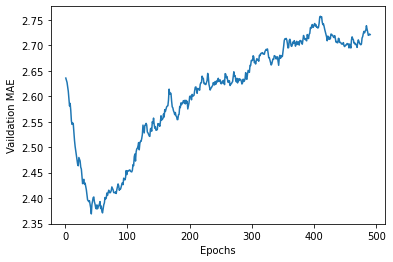

In [4]:
import matplotlib.pyplot as plt

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Vaildation MAE")
plt.show()

In [7]:
model = build_model()
model.fit(train_data, train_labels, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print(f"MAE: {test_mae_score}")

4/4 [==============================] - 0s 1ms/step - loss: 17.9965 - mae: 2.6286
MAE: 2.628560781478882
